<a href="https://colab.research.google.com/github/Prasha-git/Customer-Churn-Prediction/blob/main/Customer_churn_prediction_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()




Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df.shape)
print(df.columns)
print(df['Churn'].value_counts())


(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# This is optional but makes plots look better
sns.set(style="whitegrid")


/tmp/ipython-input-7-1632630386.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


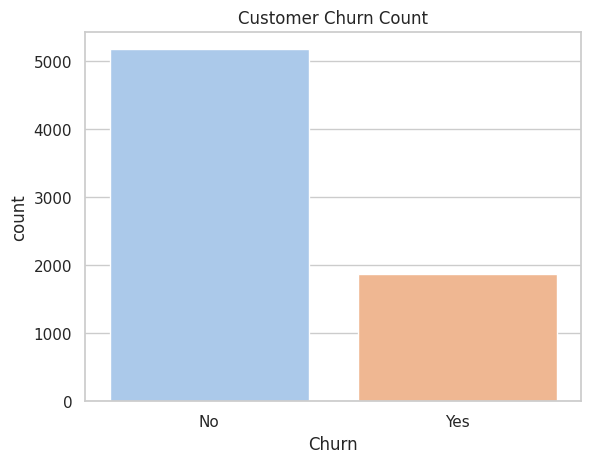

In [ ]:
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Customer Churn Count')
plt.show()


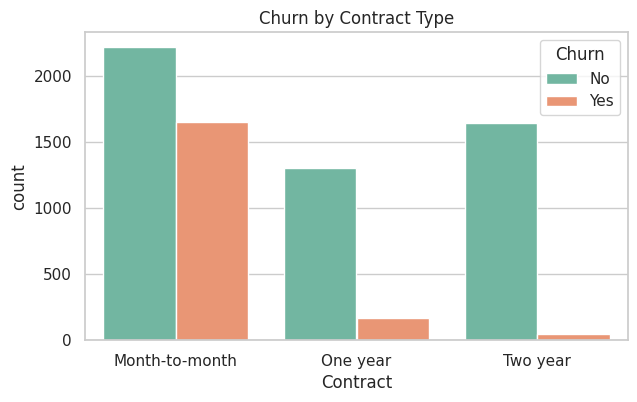

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn by Contract Type')
plt.show()


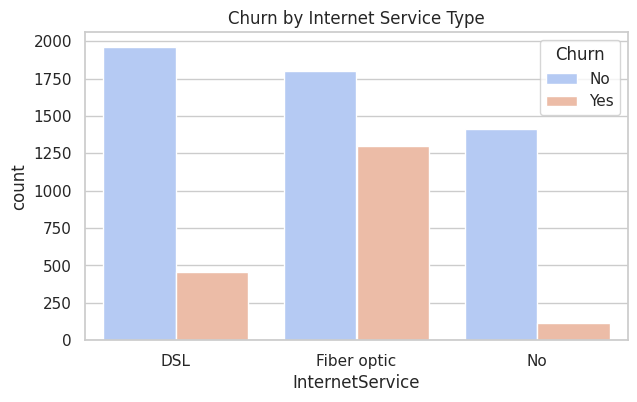

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='coolwarm')
plt.title('Churn by Internet Service Type')
plt.show()


In [ ]:
# We already dropped customerID earlier, but if not:
df.drop('customerID', axis=1, inplace=True)


In [ ]:
# Replace 'Yes'/'No' with 1/0 for all applicable columns
df.replace({'Yes': 1, 'No': 0}, inplace=True)


In [ ]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Check performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

In [ ]:
X.dtypes.value_counts()


,count
bool,6552
int64,6
float64,1


In [ ]:
print(X.select_dtypes(include='object').columns)


Index([], dtype='object')


In [ ]:
# Clean up "No internet service" and "No phone service"
cols_to_clean = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in cols_to_clean:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


KeyError: 'OnlineSecurity'

In [ ]:
# Define features and target again (since df has dummy variables now)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

In [ ]:
# Clean dataset ready at this point, after get_dummies
X = df.drop('Churn', axis=1)
y = df['Churn']

# Reset index just in case
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Do the split again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

In [ ]:
print(y.value_counts())


Churn
0    7043
Name: count, dtype: int64


In [ ]:
import pandas as pd

# 🔁 Reload original dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# ✅ Drop rows with blank TotalCharges
df = df[df['TotalCharges'].str.strip() != '']

# ✅ Convert TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# ✅ Drop customerID
df.drop('customerID', axis=1, inplace=True)

# ✅ Clean "No internet/phone service" in applicable columns
cols_to_clean = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in cols_to_clean:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# ✅ Convert Yes/No to 1/0
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# ✅ Encode target column
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# ✅ One-hot encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True)


In [ ]:
print(df['Churn'].value_counts())


Churn
0    7032
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load original dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 🧪 BEFORE DOING ANYTHING — check the Churn counts
print("Initial Churn Distribution:")
print(df['Churn'].value_counts())


Initial Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
# Remove empty TotalCharges rows (they cause issues during conversion)
df = df[df['TotalCharges'].str.strip() != '']

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Drop customerID (not needed for analysis)
df.drop('customerID', axis=1, inplace=True)

# Replace 'No internet service' and 'No phone service' with 'No'
cols_to_clean = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in cols_to_clean:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


In [ ]:
# Convert Yes/No to 1/0
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# Encode target separately
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode all remaining categorical variables
df = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [ ]:
print(y.value_counts())


Churn
0    7032
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load the dataset again (fresh start)
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Remove empty TotalCharges rows
df = df[df['TotalCharges'].str.strip() != '']
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Drop ID column
df.drop('customerID', axis=1, inplace=True)

# Keep 'Churn' column aside
churn_column = df['Churn']

# Replace 'No internet service' / 'No phone service' with 'No'
cols_to_clean = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for col in cols_to_clean:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Replace Yes/No with 1/0 (excluding 'Churn' for now!)
df = df.drop('Churn', axis=1)  # temporarily drop to protect it
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# Now bring back Churn safely
df['Churn'] = churn_column
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
print(df['Churn'].value_counts())


Churn
0    5163
1    1869
Name: count, dtype: int64


In [ ]:
# One-hot encode all remaining categorical columns
df = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [ ]:
print(X.shape, y.shape)


(7032, 23) (7032,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8009950248756219

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407



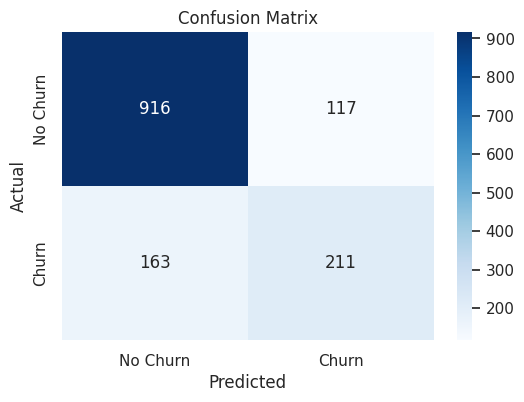

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
